In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [3]:
path = "/content/drive/MyDrive/Crop_recommendation.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.size

17600

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

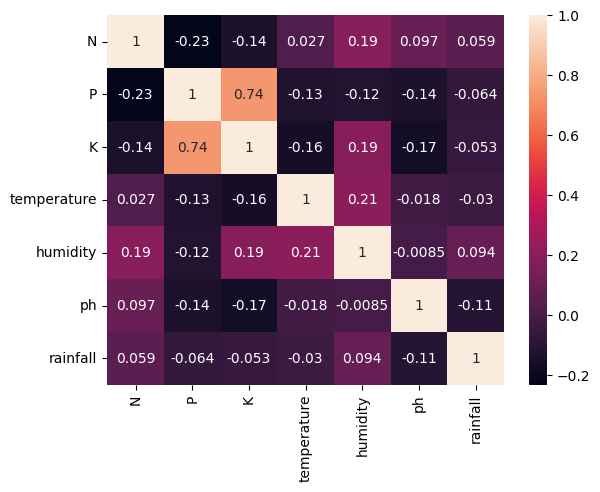

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [10]:
acc = []
model = []

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

#Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [13]:
from sklearn.metrics import accuracy_score

# Train the model
DecisionTree.fit(Xtrain, Ytrain)

# Make predictions on the test set
predicted_values = DecisionTree.predict(Xtest)

# Calculate the accuracy score and error rate
accuracy = accuracy_score(Ytest, predicted_values)
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.9
Error rate: 0.09999999999999998


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

# Create an instance of the decision tree classifier
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Train the model
DecisionTree.fit(Xtrain, Ytrain)

# Make predictions on the test set
predicted_values = DecisionTree.predict(Xtest)

# Calculate the accuracy score
accuracy = accuracy_score(Ytest, predicted_values)

end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("Accuracy:", accuracy)
print("Time taken:", total_time, "seconds")


Accuracy: 0.9
Time taken: 0.028200626373291016 seconds


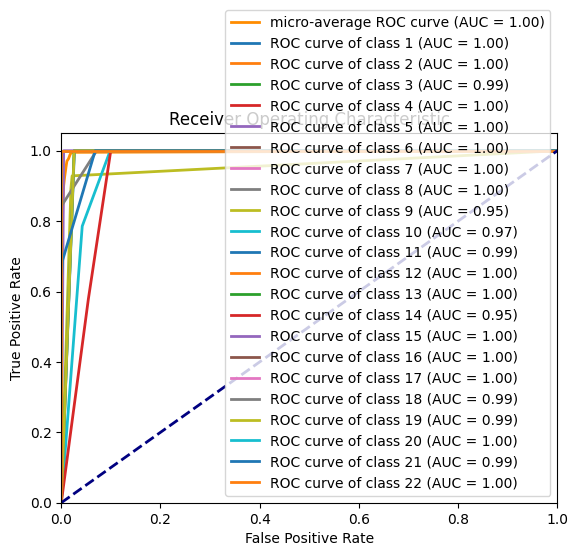

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
Ytest_probs = DecisionTree.predict_proba(Xtest)

# Compute ROC curve and micro-average AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Ytest_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(Ytest_binarized[:, i], Ytest_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC score
fpr_micro, tpr_micro, _ = roc_curve(Ytest_binarized.ravel(), Ytest_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure()
lw = 2
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=lw, label='micro-average ROC curve (AUC = %0.2f)' % roc_auc_micro)
for i in range(Ytest_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class %d (AUC = %0.2f)' % (i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [19]:
import os
import pickle

if not os.path.exists('../models'):
    os.makedirs('../models')
    
DT_pkl_filename = '../models/DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

#Gaussian Naive Bayes

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

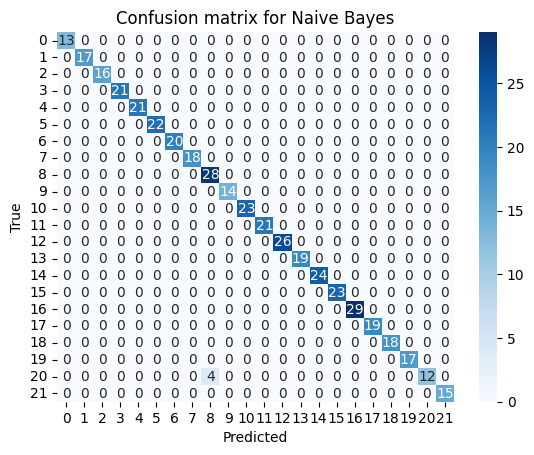

Error rate is:  0.009090909090909038


In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Ytest, predicted_values)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Naive Bayes')
plt.show()

error_rate = 1 - metrics.accuracy_score(Ytest, predicted_values)
print("Error rate is: ", error_rate)


ROC curve (micro-average AUC score = 1.00):


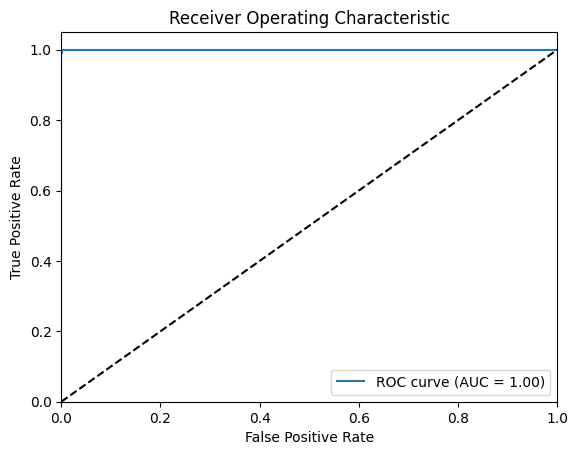

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
Ytest_probs = NaiveBayes.predict_proba(Xtest)

# Compute ROC curve and micro-average AUC score
fpr, tpr, thresholds = roc_curve(Ytest_binarized.ravel(), Ytest_probs.ravel())
roc_auc = auc(fpr, tpr)
print("ROC curve (micro-average AUC score = %0.2f):" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [23]:
import time

start_time = time.time()

NaiveBayes.fit(Xtrain,Ytrain)

end_time = time.time()
elapsed_time = end_time - start_time

print("Computational Time: {:.4f} seconds".format(elapsed_time))


Computational Time: 0.0116 seconds


In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

#Support Vector Machine

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

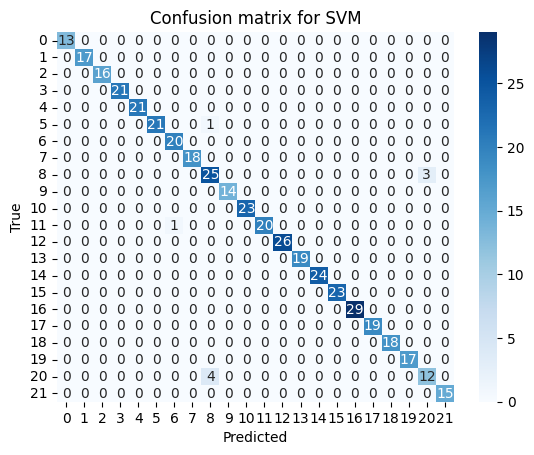

ROC curve (micro-average AUC score = 1.00):


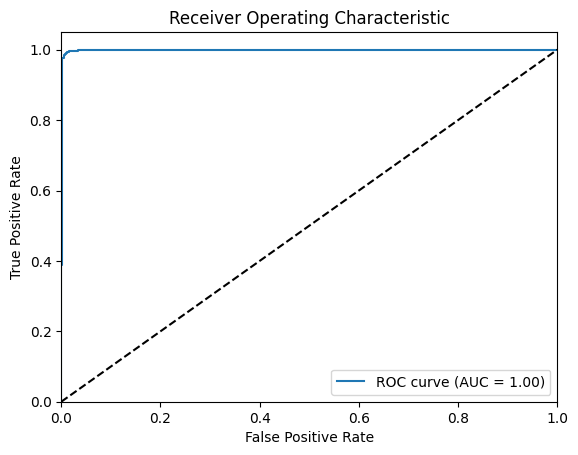

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Ytest, predicted_values)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for SVM')
plt.show()

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
Ytest_probs = SVM.decision_function(X_test_norm)

# Compute ROC curve and micro-average AUC score
fpr, tpr, thresholds = roc_curve(Ytest_binarized.ravel(), Ytest_probs.ravel())
roc_auc = auc(fpr, tpr)
print("ROC curve (micro-average AUC score = %0.2f):" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [26]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [27]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

#Logistic Regression

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

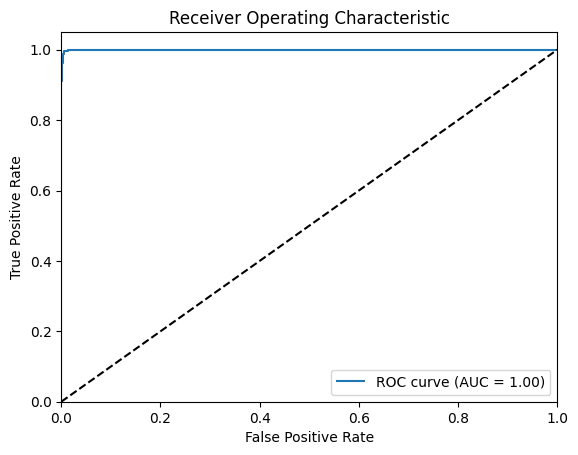

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Ytest, predicted_values)
print("Confusion Matrix:")
print(confusion_matrix)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
Ytest_probs = LogReg.predict_proba(Xtest)

# Compute ROC curve and micro-average AUC score
fpr, tpr, thresholds = roc_curve(Ytest_binarized.ravel(), Ytest_probs.ravel())
roc_auc = auc(fpr, tpr)
print("ROC curve (micro-average AUC score = %0.2f):" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [29]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
predicted_values = LogReg.predict(Xtest)

# Calculate the error rate
error_rate = 1 - metrics.accuracy_score(Ytest, predicted_values)

# Calculate the loss function
loss_function = metrics.log_loss(Ytest, LogReg.predict_proba(Xtest))

# Print the error rate and loss function
print("Error rate: ", error_rate)
print("Loss function: ", loss_function)




Error rate:  0.04772727272727273
Loss function:  0.09641470074089349


In [31]:
import time

# Record the start time
start_time = time.time()

# Train the Logistic Regression model
LogReg.fit(Xtrain, Ytrain)

# Record the end time
end_time = time.time()

# Calculate the computational time
comp_time = end_time - start_time

# Print the computational time
print("Computational time: ", comp_time)


Computational time:  0.20940494537353516


In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

#Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [34]:
import time
from sklearn.metrics import accuracy_score, classification_report

# create the random forest classifier and train it
RF = RandomForestClassifier(n_estimators=20, random_state=0)
start_time = time.time()
RF.fit(Xtrain, Ytrain)
end_time = time.time()

# make predictions on the test data
predicted_values = RF.predict(Xtest)

# calculate the accuracy and error rate
accuracy = accuracy_score(Ytest, predicted_values)
error_rate = 1.0 - accuracy

# print the accuracy, error rate, and computational time
print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Computational time:", end_time - start_time, "seconds")


Accuracy: 0.990909090909091
Error rate: 0.009090909090909038
Computational time: 0.08600759506225586 seconds


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)

predicted_values = RF.predict(Xtest)

x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))

cm = confusion_matrix(Ytest, predicted_values)
print("Confusion Matrix:")
print(cm)


RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [36]:
score = cross_val_score(RF,features,target,cv=5)
score


array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

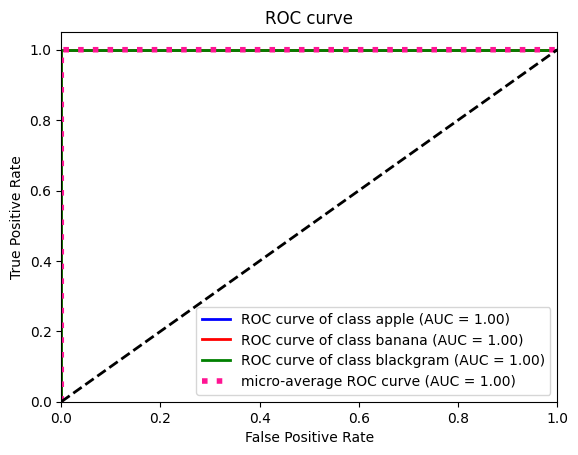

In [37]:
classes = np.unique(Ytest)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
probs = RF.predict_proba(Xtest)

# Compute ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(Ytest_binarized[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-averaged ROC curve and AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(Ytest_binarized.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

# Plot micro-averaged ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [38]:
import pickle
# Dump the trained model with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

#KNN Classifier


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [40]:
predicted_values = knn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate confusion matrix
cm = confusion_matrix(Ytest, predicted_values)
print("Confusion matrix:\n", cm)

# Calculate ROC curve and AUC score


Confusion matrix:
 [[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

ROC curve (micro-average AUC score = 1.00):


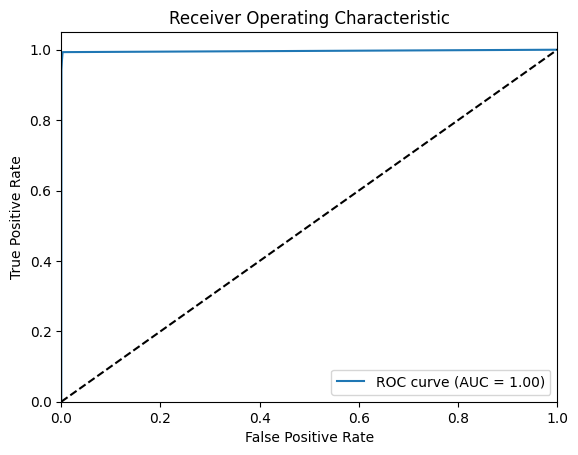

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the test labels to binary format
Ytest_binarized = label_binarize(Ytest, classes=np.unique(Ytest))

# Predict the probabilities of each class label
Ytest_probs = knn.predict_proba(Xtest)

# Compute ROC curve and micro-average AUC score
fpr, tpr, thresholds = roc_curve(Ytest_binarized.ravel(), Ytest_probs.ravel())
roc_auc = auc(fpr, tpr)
print("ROC curve (micro-average AUC score = %0.2f):" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [43]:
import time
from sklearn.metrics import accuracy_score, classification_report

# create the KNN classifier and train it
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(Xtrain, Ytrain)
end_time = time.time()

# make predictions on the test data
predicted_values = knn.predict(Xtest)

# calculate the accuracy and error rate
accuracy = accuracy_score(Ytest, predicted_values)
error_rate = 1.0 - accuracy

# print the accuracy, error rate, and computational time
print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Computational time:", end_time - start_time, "seconds")




Accuracy: 0.9704545454545455
Error rate: 0.02954545454545454
Computational time: 0.007875442504882812 seconds


In [44]:
 import pickle
# Dump the trained model with Pickle
KNN_pkl_filename = '../models/KNN.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

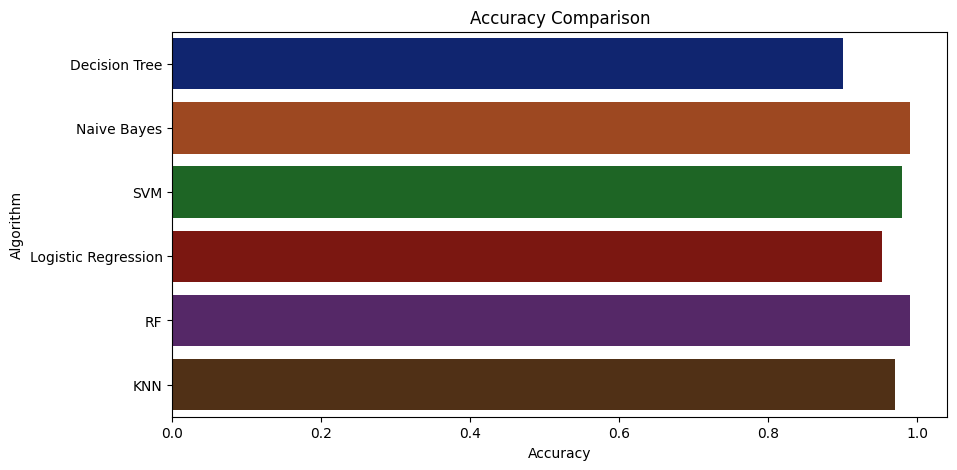

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [46]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
KNN --> 0.9704545454545455


In [47]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [48]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']


In [49]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [50]:
data = np.array([[83, 67, 60, 89, 70.3, 23.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['papaya']
